### Подключение библиотек и скриптов

In [1]:
import numpy as np
import pandas as pd
import random

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import KFold, GridSearchCV

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
matplotlib.rcParams.update({'font.size': 14})

In [4]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Test R2:\t" + str(round(r2(test_true_values, test_pred_values), 3)))
    
    plt.figure(figsize=(18,10))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')

    plt.show()

### Пути к директориям и файлам

In [5]:
train_df = pd.read_csv('./OneDrive/Рабочий стол/для проекта/train.csv')
train_df.tail()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
9995,1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,B,B,52,10311,6,NaN,1,9,B,119367.455796
9996,16265,27,2.0,64.307684,37.038420,9.0,13,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,199715.148807
9997,2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,B,B,20,4386,14,NaN,1,5,B,165953.912580
9998,14561,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,B,B,47,8004,3,125.0,3,5,B,171842.411855
9999,7202,94,1.0,35.815476,22.301367,6.0,9,9.0,1975,0.127376,B,B,43,8429,3,NaN,3,9,B,177685.627486


In [6]:
train_df.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

In [7]:
test_df = pd.read_csv('./OneDrive/Рабочий стол/для проекта/test.csv')
test_df.tail()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
4995,10379,29,2.0,43.177521,30.339945,5.0,6,5.0,1962,0.069660,B,B,31,6119,4,NaN,1,2,B
4996,16138,38,3.0,93.698122,94.521465,10.0,21,27.0,2018,0.060753,B,B,15,2787,2,520.0,0,7,B
4997,3912,101,1.0,33.656723,19.003259,5.0,2,5.0,1966,0.038693,B,B,28,6533,1,1015.0,2,5,B
4998,5722,10,1.0,38.635155,20.976257,9.0,8,14.0,1970,0.089040,B,B,33,7976,5,NaN,0,11,B
4999,11004,21,2.0,67.122742,33.944344,13.0,9,17.0,2009,0.194489,B,B,47,8004,3,125.0,3,5,B


In [8]:
test_df.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
dtype: object

### Загрузка данных

**Описание датасета**

* **Id** - идентификационный номер квартиры
* **DistrictId** - идентификационный номер района
* **Rooms** - количество комнат
* **Square** - площадь
* **LifeSquare** - жилая площадь
* **KitchenSquare** - площадь кухни
* **Floor** - этаж
* **HouseFloor** - количество этажей в доме
* **HouseYear** - год постройки дома
* **Ecology_1, Ecology_2, Ecology_3** - экологические показатели местности
* **Social_1, Social_2, Social_3** - социальные показатели местности
* **Healthcare_1, Helthcare_2** - показатели местности, связанные с охраной здоровья
* **Shops_1, Shops_2** - показатели, связанные с наличием магазинов, торговых центров
* **Price** - цена квартиры

In [9]:
train_df['Id'] = train_df['Id'].astype(str)
train_df['DistrictId'] = train_df['DistrictId'].astype(str)

### 1. EDA

1.1 Целевая переменная

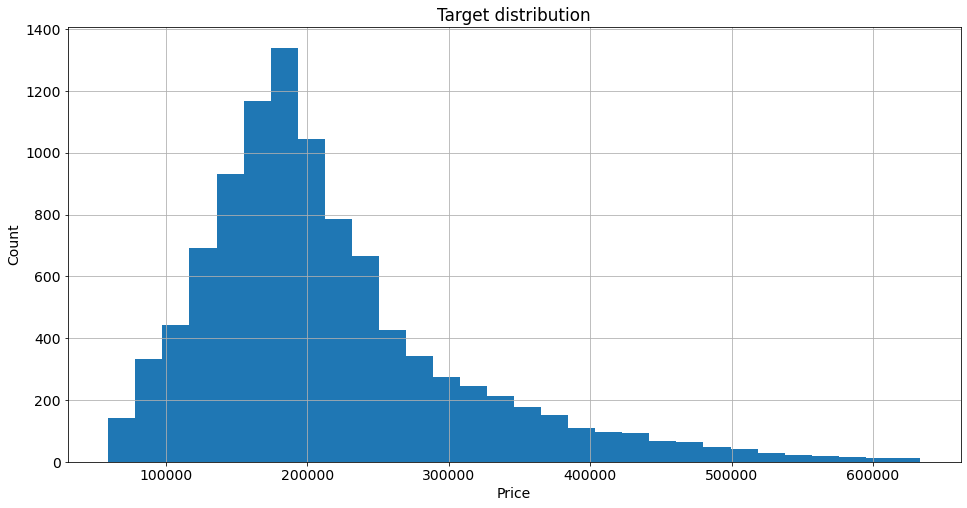

In [10]:
plt.figure(figsize = (16, 8))

train_df['Price'].hist(bins=30)
plt.ylabel('Count')
plt.xlabel('Price')

plt.title('Target distribution')
plt.show()

1.2 Количественные переменные

In [11]:
train_df.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


1.3 Номинативные переменные

In [12]:
train_df.select_dtypes(include='object').columns.tolist()

['Id', 'DistrictId', 'Ecology_2', 'Ecology_3', 'Shops_2']

In [13]:
train_df['DistrictId'].value_counts()

27     851
1      652
23     565
6      511
9      294
      ... 
174      1
205      1
117      1
199      1
207      1
Name: DistrictId, Length: 205, dtype: int64

In [14]:
train_df['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [15]:
train_df['Ecology_3'].value_counts()

B    9725
A     275
Name: Ecology_3, dtype: int64

In [16]:
train_df['Shops_2'].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

### 2. Обработка выбросов и пропусков

2.1 Rooms

In [17]:
train_df['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
6.0        1
19.0       1
Name: Rooms, dtype: int64

In [18]:
train_df['Rooms_outlier'] = 0
train_df.loc[(train_df['Rooms'] == 0) | (train_df['Rooms'] >= 6), 'Rooms_outlier'] = 1
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Rooms_outlier
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,...,B,11,3097,0,NaN,0,0,B,305018.871089,0
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,...,B,30,6207,1,1183.0,1,0,B,177734.553407,0
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,...,B,33,5261,0,240.0,3,1,B,282078.720850,0
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,...,B,1,264,0,NaN,0,1,B,168106.007630,0
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,...,B,33,8667,2,NaN,0,6,B,343995.102962,0


In [19]:
train_df.loc[train_df['Rooms'] == 0, 'Rooms'] = 1
train_df.loc[train_df['Rooms'] >= 6, 'Rooms'] = train_df['Rooms'].median()

In [20]:
train_df['Rooms'].value_counts()

2.0    3884
1.0    3713
3.0    2235
4.0     150
5.0      18
Name: Rooms, dtype: int64

2.2 Square

In [21]:
train_df['Square'].describe()

count    10000.000000
mean        56.315775
std         21.058732
min          1.136859
25%         41.774881
50%         52.513310
75%         65.900625
max        641.065193
Name: Square, dtype: float64

In [22]:
# Видим очень маленькое минимальное значение. Поэтому будем заменять все квартиры с площадью меньше 9 кв.м. на медиану
# (по данным аналитиков риелторской компании «Метриум» площадь самых маленьких апартаментов на рынке 
# Москвы составила 8,8 кв. м)

In [23]:
train_df['Square_outlier'] = 0
train_df.loc[(train_df['Square'] < 9), 'Square_outlier'] = 1

In [24]:
train_df.loc[(train_df['Square'] < 9), 'Square'] = train_df['Square'].median()
train_df[train_df['Square_outlier'] == 1]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Rooms_outlier,Square_outlier
161,6782,45,1.0,52.51331,5.257278,1.0,3,1.0,1977,0.195781,...,23,5212,6,NaN,3,2,B,438005.182323,0,1
328,4504,27,3.0,52.51331,5.610772,1.0,8,19.0,2016,0.211401,...,9,1892,0,NaN,0,1,B,161379.067034,0,1
1401,9487,5,1.0,52.51331,5.549458,1.0,1,1.0,1977,0.150818,...,16,3433,4,2643.0,4,5,B,369472.403061,0,1
4496,15744,34,1.0,52.51331,2.642219,1.0,21,4.0,1977,0.069753,...,53,13670,4,NaN,1,11,B,458378.777006,0,1
4800,7657,38,1.0,52.51331,4.618547,1.0,28,1.0,1977,0.060753,...,15,2787,2,520.0,0,7,B,483283.488083,0,1
5009,11526,27,1.0,52.51331,1.969969,1.0,18,1.0,1977,0.011654,...,4,915,0,NaN,0,0,B,107604.269441,0,1
7033,1748,88,2.0,52.51331,67.628717,1.0,24,22.0,1977,0.127376,...,43,8429,3,NaN,3,9,B,412511.088764,0,1
7470,14786,1,1.0,52.51331,4.525736,1.0,3,1.0,1977,0.007122,...,1,264,0,NaN,0,1,B,181434.825589,0,1
8572,10202,6,1.0,52.51331,4.604943,1.0,3,25.0,2014,0.243205,...,5,1564,0,540.0,0,0,B,137597.601458,0,1
8805,10527,27,1.0,52.51331,40.805837,1.0,10,17.0,2013,0.211401,...,9,1892,0,NaN,0,1,B,97560.720383,0,1


2.3 LifeSquare

In [25]:
train_df['LifeSquare'].describe()

count    7887.000000
mean       37.199645
std        86.241209
min         0.370619
25%        22.769832
50%        32.781260
75%        45.128803
max      7480.592129
Name: LifeSquare, dtype: float64

In [26]:
# Опять же видим маленькое минимально значение, поэтому будем заменять все квартиры с жилой площадью меньше 7 кв.м. на медиану

In [27]:
train_df['LifeSquare'].value_counts()

20.151696    1
28.241964    1
23.884805    1
51.826876    1
47.972602    1
            ..
45.455722    1
50.458505    1
42.172028    1
21.993610    1
27.598712    1
Name: LifeSquare, Length: 7887, dtype: int64

In [28]:
# И видим, что сложно будет применить квантили

In [29]:
train_df['LifeSquare_outlier'] = 0
train_df.loc[(train_df['LifeSquare'] < 7), 'LifeSquare_outlier'] = 1

In [30]:
train_df.loc[(train_df['LifeSquare'] < 7), 'LifeSquare'] = train_df['LifeSquare'].median()
train_df[train_df['LifeSquare_outlier'] == 1]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Rooms_outlier,Square_outlier,LifeSquare_outlier
26,8553,88,3.0,83.262530,32.78126,1.0,13,1.0,1977,0.127376,...,8429,3,NaN,3,9,B,410883.892020,0,0,1
119,5112,6,2.0,63.591740,32.78126,10.0,17,17.0,2014,0.243205,...,1564,0,540.0,0,0,B,174741.998061,0,0,1
161,6782,45,1.0,52.513310,32.78126,1.0,3,1.0,1977,0.195781,...,5212,6,NaN,3,2,B,438005.182323,0,1,1
212,1182,27,1.0,38.936986,32.78126,0.0,18,19.0,2017,0.211401,...,1892,0,NaN,0,1,B,93560.789553,0,0,1
227,3746,62,1.0,46.722042,32.78126,1.0,11,12.0,2018,0.072158,...,629,1,NaN,0,0,A,133721.121715,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9462,10079,59,1.0,48.232741,32.78126,1.0,15,17.0,2017,0.019509,...,7687,11,176.0,5,5,B,207086.637307,0,0,1
9869,3224,27,1.0,52.513310,32.78126,0.0,1,0.0,1977,0.017647,...,469,0,NaN,0,0,B,126596.941798,1,1,1
9912,13523,23,1.0,52.787090,32.78126,1.0,7,1.0,2015,0.014073,...,475,0,NaN,0,0,B,104160.492175,0,0,1
9938,2913,34,4.0,94.888593,32.78126,1.0,4,1.0,2018,0.069753,...,13670,4,NaN,1,11,B,346949.506507,0,0,1


2.4 KitchenSquare

In [31]:
train_df['KitchenSquare'].describe()

count    10000.000000
mean         6.273300
std         28.560917
min          0.000000
25%          1.000000
50%          6.000000
75%          9.000000
max       2014.000000
Name: KitchenSquare, dtype: float64

In [32]:
# Видим странные максимальне и минимальные значения. Попробуем посмотреть, можно ли применить квантили

In [33]:
train_df['KitchenSquare'].value_counts()

1.0       2460
8.0       1306
5.0       1169
10.0      1075
6.0       1038
9.0        843
0.0        697
7.0        609
12.0       249
11.0       233
13.0        67
14.0        51
4.0         39
15.0        31
3.0         22
16.0        16
20.0        14
17.0        12
19.0        11
18.0         6
2.0          4
22.0         3
112.0        2
51.0         2
58.0         2
37.0         2
32.0         2
41.0         2
43.0         2
30.0         2
25.0         2
39.0         1
23.0         1
123.0        1
40.0         1
48.0         1
21.0         1
72.0         1
27.0         1
63.0         1
1970.0       1
29.0         1
66.0         1
2014.0       1
31.0         1
78.0         1
35.0         1
42.0         1
73.0         1
60.0         1
84.0         1
26.0         1
54.0         1
36.0         1
53.0         1
96.0         1
62.0         1
75.0         1
Name: KitchenSquare, dtype: int64

In [34]:
# Впринципе можно

In [35]:
train_df['KitchenSquare'].quantile(.95), train_df['KitchenSquare'].quantile(.05)

(12.0, 0.0)

In [36]:
condition = (train_df['KitchenSquare'].isna()) \
             | (train_df['KitchenSquare'] > train_df['KitchenSquare'].quantile(.95))
        
train_df.loc[condition, 'KitchenSquare'] = train_df['KitchenSquare'].median()

train_df.loc[train_df['KitchenSquare'] < 3, 'KitchenSquare'] = 3

In [37]:
train_df['KitchenSquare'].value_counts()

3.0     3183
8.0     1306
6.0     1294
5.0     1169
10.0    1075
9.0      843
7.0      609
12.0     249
11.0     233
4.0       39
Name: KitchenSquare, dtype: int64

2.5 HouseFloor, Floor (сразу сравним)

In [38]:
train_df['HouseFloor'].value_counts()

17.0     2331
9.0      1389
12.0     1074
5.0      1031
14.0      625
16.0      576
1.0       497
25.0      374
22.0      343
0.0       269
24.0      176
8.0       141
10.0      135
4.0       134
3.0       127
15.0      123
19.0      108
20.0      105
18.0       89
7.0        59
6.0        58
2.0        48
23.0       40
21.0       33
11.0       28
13.0       27
30.0       21
40.0        7
27.0        6
37.0        4
32.0        4
28.0        3
39.0        2
48.0        2
99.0        2
29.0        1
44.0        1
47.0        1
36.0        1
31.0        1
38.0        1
117.0       1
45.0        1
26.0        1
Name: HouseFloor, dtype: int64

In [39]:
train_df['HouseFloor'].sort_values().unique()

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        36.,  37.,  38.,  39.,  40.,  44.,  45.,  47.,  48.,  99., 117.])

In [40]:
train_df['Floor'].value_counts()

4     949
5     876
3     872
6     802
7     759
8     643
9     604
2     588
10    553
11    457
12    438
13    398
14    362
16    290
15    287
17    256
1     235
18    185
19    121
20     68
21     59
22     54
24     53
25     34
23     25
26     18
27      5
28      3
32      2
42      1
37      1
33      1
31      1
Name: Floor, dtype: int64

In [41]:
train_df['Floor'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33, 37, 42],
      dtype=int64)

In [42]:
(train_df['Floor'] > train_df['HouseFloor']).sum()

1825

In [43]:
# Видим большой выброс по несоответствию расположения квартир на этажах и количества этажей в доме
# Также в HouseFloor возьмем верхний квантиль 0.99, чтобы убрать 99 и 117

In [44]:
train_df['HouseFloor_outlier'] = 0
train_df.loc[train_df['HouseFloor'] == 0, 'HouseFloor_outlier'] = 1
train_df.loc[train_df['Floor'] > train_df['HouseFloor'], 'HouseFloor_outlier'] = 1

In [45]:
train_df.loc[train_df['HouseFloor'] == 0, 'HouseFloor'] = train_df['HouseFloor'].median()

In [46]:
floor_outliers = train_df.loc[train_df['Floor'] > train_df['HouseFloor']].index
floor_outliers

Int64Index([  17,   19,   21,   25,   26,   33,   34,   37,   39,   44,
            ...
            9913, 9921, 9930, 9931, 9938, 9953, 9960, 9968, 9970, 9975],
           dtype='int64', length=1610)

In [47]:
train_df.loc[floor_outliers, 'Floor'] = train_df.loc[floor_outliers, 'HouseFloor']\
                                                .apply(lambda x: random.randint(1, x))

In [48]:
(train_df['Floor'] > train_df['HouseFloor']).sum()

0

2.6 HouseYear

In [49]:
train_df['HouseYear'].sort_values()

6794        1910
2795        1912
2066        1912
6250        1914
7610        1916
          ...   
8296        2020
2350        2020
7246        2020
8828        4968
9163    20052011
Name: HouseYear, Length: 10000, dtype: int64

In [50]:
# Видим выброс больше 2020, поэтому уберем года, которые больше 2022

In [51]:
train_df['HouseYear_outlier'] = 0
train_df.loc[train_df['HouseYear'] > 2022, 'HouseYear_outlier'] = 1

In [52]:
train_df.loc[train_df['HouseYear'] > 2022, 'HouseYear'] = train_df['HouseYear'].mode()[0]

Проверим выбросы графически

array([[<AxesSubplot:title={'center':'Rooms'}>,
        <AxesSubplot:title={'center':'Square'}>,
        <AxesSubplot:title={'center':'LifeSquare'}>,
        <AxesSubplot:title={'center':'KitchenSquare'}>],
       [<AxesSubplot:title={'center':'Floor'}>,
        <AxesSubplot:title={'center':'HouseFloor'}>,
        <AxesSubplot:title={'center':'HouseYear'}>,
        <AxesSubplot:title={'center':'Ecology_1'}>],
       [<AxesSubplot:title={'center':'Social_1'}>,
        <AxesSubplot:title={'center':'Social_2'}>,
        <AxesSubplot:title={'center':'Social_3'}>,
        <AxesSubplot:title={'center':'Healthcare_1'}>],
       [<AxesSubplot:title={'center':'Helthcare_2'}>,
        <AxesSubplot:title={'center':'Shops_1'}>,
        <AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'Rooms_outlier'}>],
       [<AxesSubplot:title={'center':'Square_outlier'}>,
        <AxesSubplot:title={'center':'LifeSquare_outlier'}>,
        <AxesSubplot:title={'center':'HouseFloor_ou

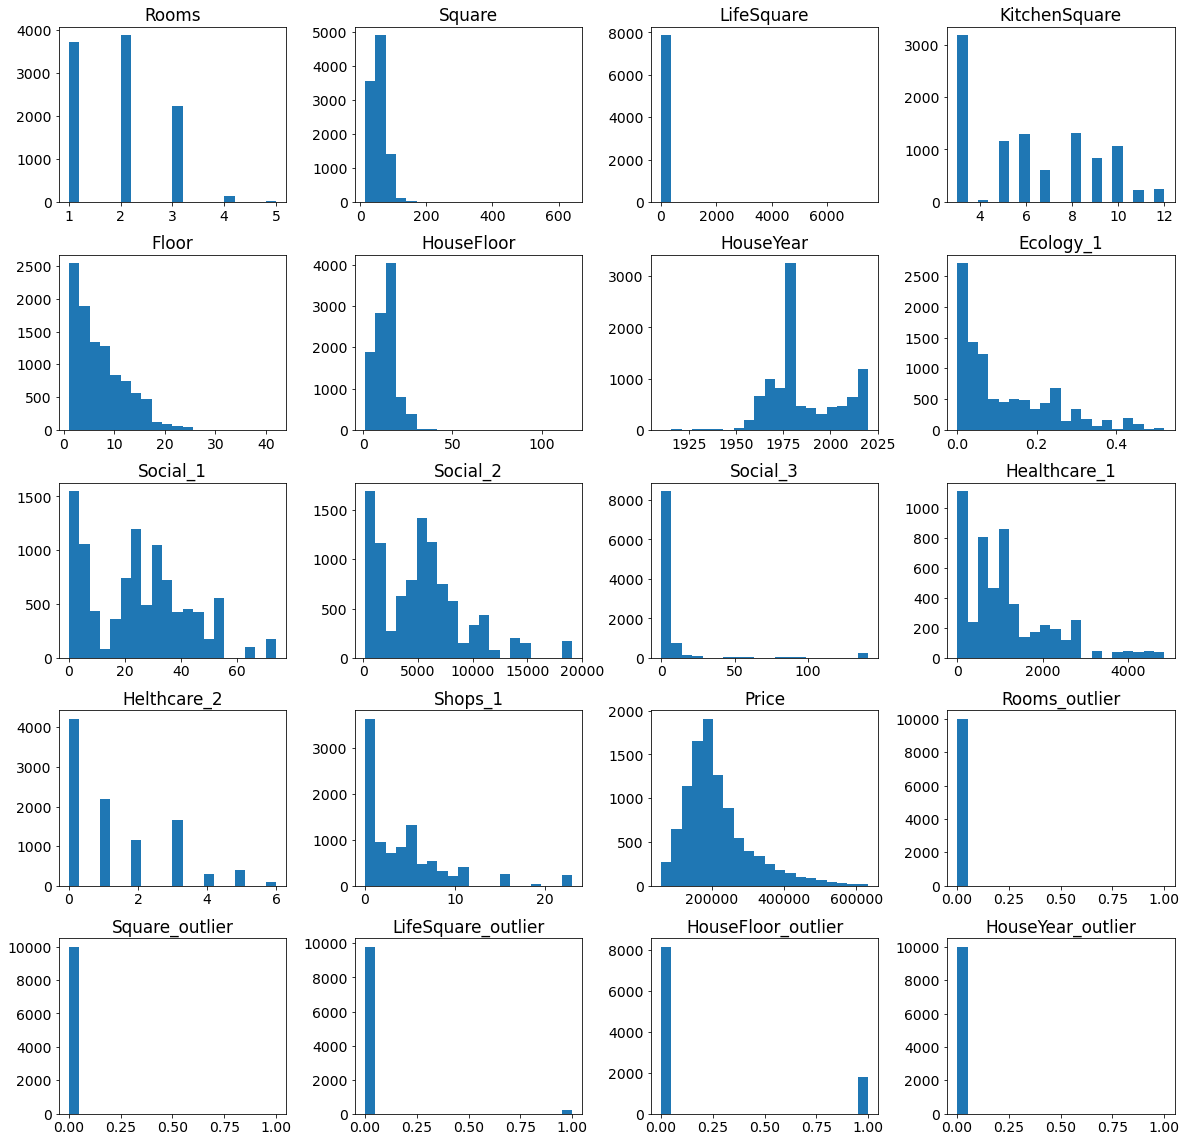

In [53]:
train_df.hist(figsize=(20, 20), bins=20, grid=False)

Проверим пропуски

In [54]:
train_df.isna().sum()

Id                       0
DistrictId               0
Rooms                    0
Square                   0
LifeSquare            2113
KitchenSquare            0
Floor                    0
HouseFloor               0
HouseYear                0
Ecology_1                0
Ecology_2                0
Ecology_3                0
Social_1                 0
Social_2                 0
Social_3                 0
Healthcare_1          4798
Helthcare_2              0
Shops_1                  0
Shops_2                  0
Price                    0
Rooms_outlier            0
Square_outlier           0
LifeSquare_outlier       0
HouseFloor_outlier       0
HouseYear_outlier        0
dtype: int64

In [55]:
# LifeSquare и Healthcare_1 необходимо будет заменить на медиану

In [56]:
median = train_df['LifeSquare'].median()
train_df['LifeSquare'].fillna(median).isna().sum()

0

In [57]:
train_df['LifeSquare'] = train_df['LifeSquare'].fillna(median)

In [58]:
median = train_df['Healthcare_1'].median()
train_df['Healthcare_1'].fillna(median).isna().sum()

0

In [59]:
train_df['Healthcare_1'] = train_df['Healthcare_1'].fillna(median)

Создадим класс для обработки выбросов и пропусков

In [60]:
class DataPreprocessing:

    def __init__(self):
        self.medians = None
        self.kitchen_square_quantile = None
        self.HouseYear_mode = None
    
    def fit(self, df):
        # применяем только к train
        self.medians = df.median()
        self.kitchen_square_quantile = X['KitchenSquare'].quantile(.95)
        self.HouseYear_mode = df['HouseYear'].mode()[0]
        
    def transform(self, df):

        df['HouseFloor'] = df['HouseFloor'].astype(int)
        
        #заполняем выбросы
        df['Rooms_outlier'] = 0
        df.loc[(df['Rooms'] == 0) | (df['Rooms'] >= 6), 'Rooms_outlier'] = 1
        df.loc[df['Rooms'] == 0, 'Rooms'] = 1
        df.loc[df['Rooms'] >= 6, 'Rooms'] = self.medians['Rooms']
        
        df['Square_outlier'] = 0
        df.loc[(df['Square'] < 9), 'Square_outlier'] = 1
        df.loc[df['Square'] < 9, 'Square'] = self.medians['Square']
        
        df['LifeSquare_outlier'] = 0
        df.loc[(df['LifeSquare'] < 7), 'LifeSquare_outlier'] = 1
        df.loc[df['LifeSquare'] < 7, 'LifeSquare'] = self.medians['LifeSquare']
        
        condition = (df['KitchenSquare'].isna()) \
                    | (df['KitchenSquare'] > self.kitchen_square_quantile)
        
        df.loc[condition, 'KitchenSquare'] = self.medians['KitchenSquare']
        df.loc[X['KitchenSquare'] < 3, 'KitchenSquare'] = 3
        
        df['HouseFloor_outlier'] = 0
        df.loc[df['HouseFloor'] == 0, 'HouseFloor_outlier'] = 1
        df.loc[df['Floor'] > df['HouseFloor'], 'HouseFloor_outlier'] = 1
        df.loc[df['HouseFloor'] == 0, 'HouseFloor'] = self.medians['HouseFloor']
        floor_outliers =df.loc[df['Floor'] > df['HouseFloor']].index
        df.loc[floor_outliers, 'Floor'] = df.loc[floor_outliers, 'HouseFloor']\
                                            .apply(lambda x: random.randint(1, x))
        
        df['HouseYear_outlier'] = 0
        df.loc[df['HouseYear'] > 2022, 'HouseYear_outlier'] = 1
        df.loc[df['HouseYear'] > 2022, 'HouseYear'] = int(self.HouseYear_mode)
        
        #заполняем пропуски
        df[['LifeSquare', 'Healthcare_1']] = df[['LifeSquare', 'Healthcare_1']].fillna(self.medians)
        
        #удалим столбец Id
        df = df.drop(['Id'], axis=1)
        
        df.fillna(self.medians, inplace=True)
        
        return df

### Построение новых признаков

Dummies

In [61]:
binary_to_numbers = {'A': 0, 'B': 1}

train_df['Ecology_2'] = train_df['Ecology_2'].replace(binary_to_numbers)
train_df['Ecology_3'] = train_df['Ecology_3'].replace(binary_to_numbers)
train_df['Shops_2'] = train_df['Shops_2'].replace(binary_to_numbers)

DistrictSize, IsDistrictLarge

In [62]:
district_size = train_df['DistrictId'].value_counts().reset_index()\
                    .rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})

district_size.head()

,DistrictId,DistrictSize
0,27,851
1,1,652
2,23,565
3,6,511
4,9,294


In [63]:
train_df = train_df.merge(district_size, on='DistrictId', how='left')
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Helthcare_2,Shops_1,Shops_2,Price,Rooms_outlier,Square_outlier,LifeSquare_outlier,HouseFloor_outlier,HouseYear_outlier,DistrictSize
0,11809,27,3.0,115.027311,32.781260,10.0,4,10.0,2014,0.075424,...,0,0,1,305018.871089,0,0,0,0,0,851
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,...,1,0,1,177734.553407,0,0,0,0,0,78
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,...,3,1,1,282078.720850,0,0,0,0,0,652
3,2352,1,1.0,40.409907,32.781260,3.0,10,22.0,1977,0.007122,...,0,1,1,168106.007630,0,0,0,0,0,652
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,...,0,6,1,343995.102962,0,0,0,0,0,89


In [64]:
(train_df['DistrictSize'] > 100).value_counts()

True     5069
False    4931
Name: DistrictSize, dtype: int64

In [65]:
train_df['IsDistrictLarge'] = (train_df['DistrictSize'] > 100).astype(int)

LifeSquare_to_Square

In [66]:
train_df['LifeSquare_to_Square'] = train_df['LifeSquare'] / train_df['Square']
train_df['LifeSquare_to_Square'].describe()

count    10000.000000
mean         0.657753
std          0.928157
min          0.054210
25%          0.541293
50%          0.615022
75%          0.709735
max         91.567973
Name: LifeSquare_to_Square, dtype: float64

MedPriceByDistrict

In [67]:
med_price_by_district = train_df.groupby(['DistrictId', 'Rooms'], as_index=False).agg({'Price':'median'})\
                            .rename(columns={'Price':'MedPriceByDistrict'})

med_price_by_district.head()

,DistrictId,Rooms,MedPriceByDistrict
0,0,1.0,142799.434052
1,0,2.0,176210.812334
2,0,3.0,300610.359425
3,1,1.0,146735.671740
4,1,2.0,202666.310126


MedPriceByDistrict

In [68]:
med_price_by_district = train_df.groupby(['DistrictId', 'Rooms'], as_index=False).agg({'Price':'median'})\
                            .rename(columns={'Price':'MedPriceByDistrict'})

med_price_by_district.head()

,DistrictId,Rooms,MedPriceByDistrict
0,0,1.0,142799.434052
1,0,2.0,176210.812334
2,0,3.0,300610.359425
3,1,1.0,146735.671740
4,1,2.0,202666.310126


In [69]:
med_price_by_district.shape

(667, 3)

In [70]:
train_df = train_df.merge(med_price_by_district, on=['DistrictId', 'Rooms'], how='left')
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Price,Rooms_outlier,Square_outlier,LifeSquare_outlier,HouseFloor_outlier,HouseYear_outlier,DistrictSize,IsDistrictLarge,LifeSquare_to_Square,MedPriceByDistrict
0,11809,27,3.0,115.027311,32.781260,10.0,4,10.0,2014,0.075424,...,305018.871089,0,0,0,0,0,851,1,0.284987,213530.788443
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,...,177734.553407,0,0,0,0,0,78,0,0.581666,146032.829834
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,...,282078.720850,0,0,0,0,0,652,1,0.608509,244005.272380
3,2352,1,1.0,40.409907,32.781260,3.0,10,22.0,1977,0.007122,...,168106.007630,0,0,0,0,0,652,1,0.811218,146735.671740
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,...,343995.102962,0,0,0,0,0,89,0,0.599867,201584.441255


MedPriceByFloorYear

In [71]:
def floor_to_cat(X):

    X['floor_cat'] = 0

    X.loc[X['Floor'] <= 3, 'floor_cat'] = 1  
    X.loc[(X['Floor'] > 3) & (X['Floor'] <= 5), 'floor_cat'] = 2
    X.loc[(X['Floor'] > 5) & (X['Floor'] <= 9), 'floor_cat'] = 3
    X.loc[(X['Floor'] > 9) & (X['Floor'] <= 15), 'floor_cat'] = 4
    X.loc[X['Floor'] > 15, 'floor_cat'] = 5

    return X


def floor_to_cat_pandas(X):
    bins = [X['Floor'].min(), 3, 5, 9, 15, X['Floor'].max()]
    X['floor_cat'] = pd.cut(X['Floor'], bins=bins, labels=False)
    
    X['floor_cat'].fillna(-1, inplace=True)
    return X


def year_to_cat(X):

    X['year_cat'] = 0

    X.loc[X['HouseYear'] <= 1941, 'year_cat'] = 1
    X.loc[(X['HouseYear'] > 1941) & (X['HouseYear'] <= 1945), 'year_cat'] = 2
    X.loc[(X['HouseYear'] > 1945) & (X['HouseYear'] <= 1980), 'year_cat'] = 3
    X.loc[(X['HouseYear'] > 1980) & (X['HouseYear'] <= 2000), 'year_cat'] = 4
    X.loc[(X['HouseYear'] > 2000) & (X['HouseYear'] <= 2010), 'year_cat'] = 5
    X.loc[(X['HouseYear'] > 2010), 'year_cat'] = 6

    return X


def year_to_cat_pandas(X):
    bins = [X['HouseYear'].min(), 1941, 1945, 1980, 2000, 2010, X['HouseYear'].max()]
    X['year_cat'] = pd.cut(X['HouseYear'], bins=bins, labels=False)
    
    X['year_cat'].fillna(-1, inplace=True)
    return X

In [72]:
bins = [train_df['Floor'].min(), 3, 5, 9, 15, train_df['Floor'].max()]
pd.cut(train_df['Floor'], bins=bins, labels=False)

0       1.0
1       2.0
2       0.0
3       3.0
4       4.0
       ... 
9995    0.0
9996    3.0
9997    0.0
9998    0.0
9999    2.0
Name: Floor, Length: 10000, dtype: float64

In [73]:
train_df = year_to_cat(train_df)
train_df = floor_to_cat(train_df)
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Square_outlier,LifeSquare_outlier,HouseFloor_outlier,HouseYear_outlier,DistrictSize,IsDistrictLarge,LifeSquare_to_Square,MedPriceByDistrict,year_cat,floor_cat
0,11809,27,3.0,115.027311,32.781260,10.0,4,10.0,2014,0.075424,...,0,0,0,0,851,1,0.284987,213530.788443,6,2
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,...,0,0,0,0,78,0,0.581666,146032.829834,3,3
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,...,0,0,0,0,652,1,0.608509,244005.272380,4,1
3,2352,1,1.0,40.409907,32.781260,3.0,10,22.0,1977,0.007122,...,0,0,0,0,652,1,0.811218,146735.671740,3,4
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,...,0,0,0,0,89,0,0.599867,201584.441255,3,5


In [74]:
med_price_by_floor_year = train_df.groupby(['year_cat', 'floor_cat'], as_index=False).agg({'Price':'median'}).\
                                            rename(columns={'Price':'MedPriceByFloorYear'})
med_price_by_floor_year.head()

,year_cat,floor_cat,MedPriceByFloorYear
0,1,1,379841.447890
1,1,2,321488.560449
2,1,3,425423.585714
3,1,4,274992.472366
4,2,1,467230.539057


In [75]:
train_df = train_df.merge(med_price_by_floor_year, on=['year_cat', 'floor_cat'], how='left')
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,LifeSquare_outlier,HouseFloor_outlier,HouseYear_outlier,DistrictSize,IsDistrictLarge,LifeSquare_to_Square,MedPriceByDistrict,year_cat,floor_cat,MedPriceByFloorYear
0,11809,27,3.0,115.027311,32.781260,10.0,4,10.0,2014,0.075424,...,0,0,0,851,1,0.284987,213530.788443,6,2,161825.406053
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,...,0,0,0,78,0,0.581666,146032.829834,3,3,192330.440480
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,...,0,0,0,652,1,0.608509,244005.272380,4,1,201809.432922
3,2352,1,1.0,40.409907,32.781260,3.0,10,22.0,1977,0.007122,...,0,0,0,652,1,0.811218,146735.671740,3,4,183708.393375
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,...,0,0,0,89,0,0.599867,201584.441255,3,5,173028.982008


Создадим класс для фичей

In [76]:
class FeatureGenetator():
    
    
    def __init__(self):
        self.DistrictId_counts = None
        self.binary_to_numbers = None
        self.med_price_by_district = None
        self.med_price_by_floor_year = None
        self.house_year_max = None
        self.floor_max = None
        self.house_year_min = None
        self.floor_min = None
        self.district_size = None
        
    def fit(self, X, y=None):
        
        X = X.copy()
        
        # Binary features
        self.binary_to_numbers = {'A': 0, 'B': 1}
        
        # DistrictID
        self.district_size = X['DistrictId'].value_counts().reset_index() \
                               .rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})
                
        # Target encoding
        ## District, Rooms
        df = X.copy()
        
        if y is not None:
            df['Price'] = y.values
            
            self.med_price_by_district = df.groupby(['DistrictId', 'Rooms'], as_index=False).agg({'Price':'median'})\
                                            .rename(columns={'Price':'MedPriceByDistrict'})
            
            self.med_price_by_district_median = self.med_price_by_district['MedPriceByDistrict'].median()
            
        ## floor, year
        if y is not None:
            self.floor_max = df['Floor'].max()
            self.floor_min = df['Floor'].min()
            self.house_year_max = df['HouseYear'].max()
            self.house_year_min = df['HouseYear'].min()
            df['Price'] = y.values
            df = self.floor_to_cat(df)
            df = self.year_to_cat(df)
            self.med_price_by_floor_year = df.groupby(['year_cat', 'floor_cat'], as_index=False).agg({'Price':'median'}).\
                                            rename(columns={'Price':'MedPriceByFloorYear'})
            self.med_price_by_floor_year_median = self.med_price_by_floor_year['MedPriceByFloorYear'].median()
        

        
    def transform(self, X):
        
        # Binary features
        X['Ecology_2'] = X['Ecology_2'].map(self.binary_to_numbers)  # self.binary_to_numbers = {'A': 0, 'B': 1}
        X['Ecology_3'] = X['Ecology_3'].map(self.binary_to_numbers)
        X['Shops_2'] = X['Shops_2'].map(self.binary_to_numbers)
        
        # DistrictId, IsDistrictLarge
        X = X.merge(self.district_size, on='DistrictId', how='left')
        
        X['new_district'] = 0
        X.loc[X['DistrictSize'].isna(), 'new_district'] = 1
        
        X['DistrictSize'].fillna(5, inplace=True)
        
        X['IsDistrictLarge'] = (X['DistrictSize'] > 100).astype(int)
        
        # More categorical features
        X = self.floor_to_cat(X)  # + столбец floor_cat
        X = self.year_to_cat(X)   # + столбец year_cat
        
        # Доля жилой площади от общей
        X['LifeSquare_to_Square'] = X['LifeSquare'] / X['Square']
        
        # Target encoding
        if self.med_price_by_district is not None:
            X = X.merge(self.med_price_by_district, on=['DistrictId', 'Rooms'], how='left')
            X['MedPriceByDistrict'].fillna(self.med_price_by_district_median, inplace=True)
            
        if self.med_price_by_floor_year is not None:
            X = X.merge(self.med_price_by_floor_year, on=['year_cat', 'floor_cat'], how='left')
            X['MedPriceByFloorYear'].fillna(self.med_price_by_floor_year_median, inplace=True)
        
        return X
    
    def floor_to_cat(self, X):
        bins = [self.floor_min, 3, 5, 9, 15, self.floor_max]
        X['floor_cat'] = pd.cut(X['Floor'], bins=bins, labels=False)

        X['floor_cat'].fillna(-1, inplace=True)
        return X
     
    def year_to_cat(self, X):
        bins = [self.house_year_min, 1941, 1945, 1980, 2000, 2010, self.house_year_max]
        X['year_cat'] = pd.cut(X['HouseYear'], bins=bins, labels=False)

        X['year_cat'].fillna(-1, inplace=True)
        return X

### Отбор признаков

In [77]:
train_df.isna().sum()

Id                      0
DistrictId              0
Rooms                   0
Square                  0
LifeSquare              0
KitchenSquare           0
Floor                   0
HouseFloor              0
HouseYear               0
Ecology_1               0
Ecology_2               0
Ecology_3               0
Social_1                0
Social_2                0
Social_3                0
Healthcare_1            0
Helthcare_2             0
Shops_1                 0
Shops_2                 0
Price                   0
Rooms_outlier           0
Square_outlier          0
LifeSquare_outlier      0
HouseFloor_outlier      0
HouseYear_outlier       0
DistrictSize            0
IsDistrictLarge         0
LifeSquare_to_Square    0
MedPriceByDistrict      0
year_cat                0
floor_cat               0
MedPriceByFloorYear     0
dtype: int64

In [78]:
train_df.columns.tolist()

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Price',
 'Rooms_outlier',
 'Square_outlier',
 'LifeSquare_outlier',
 'HouseFloor_outlier',
 'HouseYear_outlier',
 'DistrictSize',
 'IsDistrictLarge',
 'LifeSquare_to_Square',
 'MedPriceByDistrict',
 'year_cat',
 'floor_cat',
 'MedPriceByFloorYear']

In [79]:
feature_names = ['Rooms', 'Square', 'LifeSquare', 
                 'KitchenSquare', 'Floor', 
                 'HouseFloor', 'HouseYear',
                 'Ecology_1', 'Ecology_2', 'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
                 'Helthcare_2', 'Shops_1', 'Shops_2']

new_feature_names = ['Rooms_outlier', 'Square_outlier', 'LifeSquare_outlier', 'HouseFloor_outlier', 'HouseYear_outlier', 
                    'DistrictSize', 'LifeSquare_to_Square',
                     'new_district', 'IsDistrictLarge',  'MedPriceByDistrict', 
                     'MedPriceByFloorYear']

target_name = 'Price'

### Разбиение на train и test

In [80]:
train_df = pd.read_csv('./OneDrive/Рабочий стол/для проекта/train.csv')
test_df = pd.read_csv('./OneDrive/Рабочий стол/для проекта/test.csv')

X = train_df.drop(columns=target_name)
y = train_df[target_name]

In [81]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=21)

In [82]:
preprocessor = DataPreprocessing()
preprocessor.fit(X_train)

X_train = preprocessor.transform(X_train)
X_valid = preprocessor.transform(X_valid)
test_df = preprocessor.transform(test_df)

X_train.shape, X_valid.shape, test_df.shape

((6700, 23), (3300, 23), (5000, 23))

In [83]:
features_gen = FeatureGenetator()
features_gen.fit(X_train, y_train)

X_train = features_gen.transform(X_train)
X_valid = features_gen.transform(X_valid)
test_df = features_gen.transform(test_df)

X_train.shape, X_valid.shape, test_df.shape

((6700, 31), (3300, 31), (5000, 31))

In [84]:
X_train = X_train[feature_names + new_feature_names]
X_valid = X_valid[feature_names + new_feature_names]
test_df = test_df[feature_names + new_feature_names]

Train R2:	0.917
Test R2:	0.72


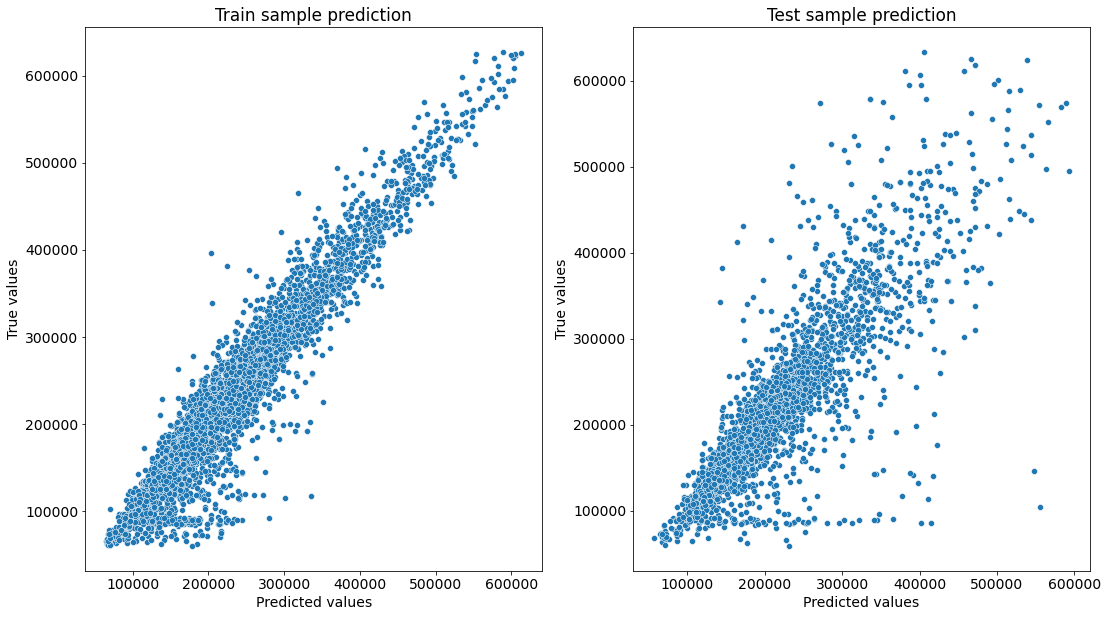

In [86]:
gb_model = GradientBoostingRegressor(criterion='mse',
                                     max_depth=5,
                                     min_samples_leaf=4,
                                     random_state=42,  
                                     n_estimators=200)
gb_model.fit(X_train, y_train)

y_train_preds = gb_model.predict(X_train)
y_test_preds = gb_model.predict(X_valid)

evaluate_preds(y_train, y_train_preds, y_valid, y_test_preds)

### Прогнозирование на тестовом датасете

In [87]:
test_df.shape

(5000, 28)

In [88]:
test_df

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,...,Square_outlier,LifeSquare_outlier,HouseFloor_outlier,HouseYear_outlier,DistrictSize,LifeSquare_to_Square,new_district,IsDistrictLarge,MedPriceByDistrict,MedPriceByFloorYear
0,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,1,1,...,0,0,0,0,76.0,0.518193,0,0,171145.169069,188251.441866
1,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,1,1,...,0,0,0,0,164.0,1.001747,0,1,131107.271962,177733.191588
2,2.0,59.463678,32.679351,9.0,19,19.0,1977,0.211401,1,1,...,0,0,0,0,580.0,0.549568,0,1,165993.292450,172123.099004
3,3.0,49.646030,33.893825,3.0,2,2.0,1965,0.014073,1,1,...,0,0,0,0,372.0,0.682710,0,1,172778.615365,180363.180393
4,1.0,53.837056,32.679351,1.0,8,17.0,1977,0.309479,1,1,...,0,0,0,0,65.0,0.607005,0,0,164116.183543,192840.250096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2.0,43.177521,30.339945,5.0,2,5.0,1962,0.069660,1,1,...,0,0,1,0,56.0,0.702679,0,0,183575.963167,180363.180393
4996,3.0,93.698122,94.521465,10.0,21,27.0,2018,0.060753,1,1,...,0,0,0,0,26.0,1.008787,0,0,425037.641820,192555.497090
4997,1.0,33.656723,19.003259,3.0,2,5.0,1966,0.038693,1,1,...,0,0,0,0,54.0,0.564620,0,0,156266.487610,180363.180393
4998,1.0,38.635155,20.976257,9.0,8,14.0,1970,0.089040,1,1,...,0,0,0,0,40.0,0.542932,0,0,185704.766694,192840.250096


In [89]:
submit = pd.read_csv('./OneDrive/Рабочий стол/для проекта/sample_submission.csv')
submit.head()

,Id,Price
0,4567,200000.0
1,5925,200000.0
2,960,200000.0
3,3848,200000.0
4,746,200000.0


In [90]:
predictions = gb_model.predict(test_df)
predictions

array([166460.49463987, 125352.86810017, 135262.87583438, ...,
       150051.1005905 , 195992.95139719, 260729.08487835])

In [91]:
submit['Price'] = predictions
submit.head()

,Id,Price
0,4567,166460.494640
1,5925,125352.868100
2,960,135262.875834
3,3848,111727.534971
4,746,162987.911336


In [92]:
submit.to_csv('gb_submit.csv', index=False)